MSDS 432 - Mini Programming Assignment 5<Br>
Prepared by Vincent Pun

In this exercise, we will begin to explore the concept of hashing and how it related to various object containers with respect to computational complexity.  We will begin with the base code for as described in Chapter 5 of Grokking Algorithms (Bhargava 2016).  

Example code for the base algorithm is available in the GitHub site for the textbook (https://github.com/egonSchiele/grokking_algorithms/tree/master/05_hash_tables/python )

In [75]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd

import seaborn as sns
import scipy.stats as stats

import os
import time
import datetime

# To plot pretty figures
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

***Functions***

In [45]:
def quicksort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)

In [76]:
# Bhargava's binary search
def binary_search(mylist, item):
    start_time = (datetime.datetime.now())
    low = 0
    high =len(mylist) - 1 
    count = 0
    while low <= high:
        mid = (low + high)
        guess = mylist[mid]
        if guess == item:
            return mid
        if guess > item:
            high = mid - 1
        else:
            low = mid + 1
        count+=1
    return None

In [47]:
# linear search
def linear_search(mylist, item):
    for i in range(len(mylist)):
        if mylist[i]==item:
            return i
    return None

***Create Datasets***

1. Create the following three datasets.
Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates in the name) and store those names in an unsorted list.<Br>
Now store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ). 
Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.<Br>
<Br>
At this point you should have three collections: <Br>
(1) an unsorted list of names,<Br>
(2) a set of those same names, and<Br>
(3) a sorted list of the same names.  <Br>
<Br>
Something like this:<Br>
#names_unsrt = ['B', 'X', 'T'],<Br>
#names_set = {'B', 'X', 'T'}, and<Br>
#names_srt = ['B', 'T', 'X'] 

In [15]:
#https://www.educative.io/edpresso/how-to-generate-a-random-string-in-python
#using random module different random strings can be generated
import string, random

#names_unsrt
names_unsrt = list()

#list1 = 200 strings, each 50 characters long
while len(names_unsrt) <= 99999:
    names_unsrt.append(''.join(random.choice(string.ascii_lowercase) for i in range(10)))

#make sure there are no duplicates in the name 
print("No Duplicates in List:",len(set(names_unsrt)) == len(names_unsrt)) 



No Duplicates in List: True


In [16]:
#names_set
names_set = set(names_unsrt)

In [37]:
#names_srt
names_srt = names_unsrt.copy()

start=time.time()

#Used Quicksort because O(log(n)) time is pretty good
names_srt = quicksort(names_srt)

end = time.time()

executiontime = 1000*(end-start)

print("Quick Sort Time of names_srt = ",round(executiontime,4),"ms")


Quick Sort Time of names_srt =  347.6539 ms


2. Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

In [120]:
#names_unsrt ---> temparray
temparray = np.array([names_unsrt[9999],names_unsrt[29999],names_unsrt[49999],names_unsrt[69999],names_unsrt[89999],names_unsrt[99999]])
temparray

array(['jyrqjzaaxf', 'bjcuolqxlz', 'xdyriibvch', 'cpoalgcumn',
       'nofzdzxway', 'kjpenvhpxv'], dtype='<U10')

3. Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.

In [91]:
#Linear search for the unsorted list (names_unsrt)
#linear_search
start=time.time()

for items in temparray:
    result = linear_search(names_unsrt,items)
    values = names_unsrt[result]

end = time.time()

executiontime_linear_search = 1000*(end-start)

print("linear_search: ",round(executiontime_linear_search,4),"ms")

#check
values==temparray[-1]


linear_search:  27.513 ms


True

In [87]:
#Binary search for the sorted list (names_srt)
#binary_search
start=time.time()

for items in temparray:
    result2 = binary_search(names_srt,items)
    values2 = names_srt[result]

end = time.time()

executiontime_binary_search = 1000*(end-start)

print("binary_search: ",round(executiontime_binary_search,4),"ms")

#check
values2==temparray[-1]

binary_search:  130.146 ms


True

In [122]:
#set.remove() (or the in keyword) built in for the set (names_set)
names_set2 = names_set.copy()

start=time.time()

for item in temparray[:]:
   
    names_set2.remove(item)
    
end = time.time()

executiontime_remove = 1000*(end-start)

print("remove: ",round(executiontime_remove,4),"ms")

#check that it's removed the items in temparray properly
len(names_set)==(len(names_set2)+len(temparray))

remove:  0.2029 ms


True

**Modeling**

4. Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance. 

In [133]:
allresults = [executiontime_linear_search, 
              executiontime_binary_search, 
              executiontime_remove]

names = ['Linear','Binary','Built-In']

table = pd.DataFrame(list(zip(names,allresults)),columns=['Name','Time (ms)'])

table

,Name,Time (ms)
0,Linear,27.513027
1,Binary,130.146027
2,Built-In,0.202894


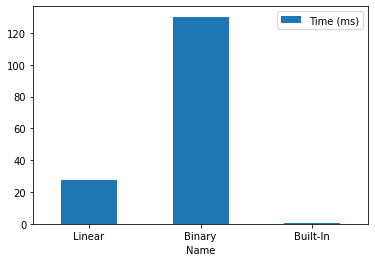

In [134]:
table.plot.bar(x='Name',y='Time (ms)',rot=0)

**Executive Summary**

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

Program code should conform to best practices in software development, as described in the coding/software development textbook used in the course.

Set up a personal computer-based Git repository (or private repository on Github) for your work with algorithms this term. Beginning with this week's mini programming assignment, utilize Git as you work on software development.

The purpose of this report is to compare search algorithms on a variety of lists and sets. The key difference between lists and sets for this scenario is that lists can be ordered (names_srt), where sets are unordered. The objects names_srt and names_unsrt are both lists, where names_set is a set. 

When observing the bar plot above, we see that linear and binary searches on lists perform a lot worse than Python's built-in .remove() function on a set. Hash tables operate on O(1) time on average when ti comes to searching, inserting, and deleting values. This is a lot faster than both linear and binary search algorithms that are performed on lists, as the latter perform on O(n) time on average, even if lists are sorted. 

When having to quickly identify values that have key-value relationships, data engineers should often utilize hash tables, as they are are powerful data structure that can operate very fast for most operations. In addition to modeling relationships in data, data engineers should also utilize how hash tables are used for caching data. 



